Full Process in Words

Load → get MNIST data.

Inspect dimensions → know input (784) & output (10 classes).

Preprocess → normalize + flatten + encode labels.

Build model → stack layers (Dense + ReLU + Softmax).

Compile → tell it how to learn (loss + optimizer).

Train → feed training data.

Test → check performance on unseen data.

Predict → actually use the model.

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


X_train → training features (input data, like images or numbers).

y_train → training labels (correct answers for each input).

X_test → testing features (new data to check model performance).

y_test → testing labels (answers for the test set).

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

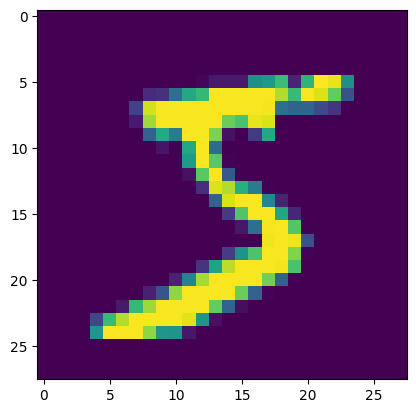

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [9]:
X_train = X_train/255
X_test = X_test/255

In [39]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) #Flatten will allign data of my array in single line.
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax')) #Multi classification = softmax else sigmoid.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam',metrics = ['accuracy'])

In [42]:
early_stop = EarlyStopping(
    monitor='val_loss',   # what to monitor (validation loss here)
    patience=3,           # stop if no improvement for 3 epochs
    restore_best_weights=True  # roll back to the best model
)

In [44]:
history = model.fit(X_train, y_train, epochs = 14, validation_split = 0.2,callbacks=[early_stop], verbose=1)

Epoch 1/14
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9652 - loss: 0.1190 - val_accuracy: 0.9656 - val_loss: 0.1155
Epoch 2/14
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9769 - loss: 0.0789 - val_accuracy: 0.9712 - val_loss: 0.1009
Epoch 3/14
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9823 - loss: 0.0605 - val_accuracy: 0.9697 - val_loss: 0.1024
Epoch 4/14
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9850 - loss: 0.0472 - val_accuracy: 0.9733 - val_loss: 0.0915
Epoch 5/14
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9893 - loss: 0.0363 - val_accuracy: 0.9719 - val_loss: 0.0989
Epoch 6/14
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9924 - loss: 0.0266 - val_accuracy: 0.9764 - val_loss: 0.0895
Epoch 7/14
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9937 - loss: 0.0216 - val_accuracy: 0.9749 - val_loss: 0.0950
Epoch 8/14
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9956 - loss: 0.0166 - 

In [45]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [47]:
y_pred = y_prob.argmax(axis = 1)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9778

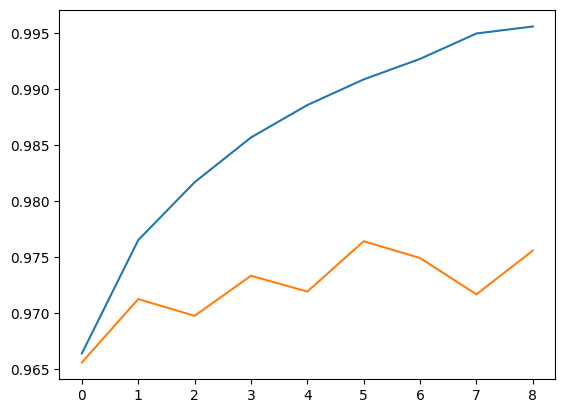

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])